In [15]:
import os, datetime

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [16]:
# aim is to predict life expectancy of a country
data = pd.read_csv("./datasets/life_expectancy.csv")

data.sample(5)

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
1729,Mongolia,2002,Developing,63.8,263.0,2,2.43,55.608782,98.0,1205,...,98.0,5.81,98.0,0.1,571.518830,2443659.0,2.4,2.5,0.599,10.1
356,Brazil,2011,Developing,74.1,152.0,51,7.58,1084.999766,98.0,43,...,98.0,8.90,99.0,0.1,13167.472890,198686688.0,2.9,2.8,0.724,14.0
1046,Grenada,2011,Developing,72.9,15.0,0,7.84,11.567156,94.0,0,...,95.0,6.35,95.0,0.1,741.484380,NaN,3.8,3.8,0.741,15.8
2116,Republic of Moldova,2002,Developing,67.5,225.0,1,6.71,0.000000,99.0,4929,...,98.0,8.31,97.0,0.1,NaN,NaN,3.4,3.6,NaN,NaN
1630,Mali,2003,Developing,52.0,299.0,59,0.54,6.660452,79.0,232,...,67.0,6.25,63.0,2.2,391.791281,125128.0,1.3,1.2,0.318,5.2


In [18]:
data.shape

(2938, 22)

In [19]:
data.isna().sum()  # gets num of nan entris per col

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

In [20]:
# fill na value of a col with mean value of that col
countries = data["Country"].unique()


# cols that have null values
na_cols = ["Life expectancy ", "Adult Mortality", "Alcohol", "Hepatitis B",
          " BMI ", "Polio", "Total expenditure", "Diphtheria ", "GDP",
          " thinness  1-19 years", " thinness 5-9 years", "Population",
          "Income composition of resources"]

for col in na_cols:
    for country in countries:
        data.loc[data["Country"] == country, col] = data.loc[data["Country"] == country, col]\
                                                    .fillna(data[data["Country"] == country][col].mean())  # calc mean of col in focus and replace nan values with it
        

In [21]:
data.isna().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                             17
percentage expenditure               0
Hepatitis B                        144
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                                0
Total expenditure                   32
Diphtheria                           0
 HIV/AIDS                            0
GDP                                405
Population                         648
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

In [22]:
# since still nan values(occurs if a col has all values to be nan)

data = data.dropna()  # drop all nan values

data.shape

(2128, 22)

In [23]:
# EDA
data["Status"].value_counts()

Developing    1824
Developed      304
Name: Status, dtype: int64

In [24]:
data["Country"].value_counts()

Indonesia       16
Austria         16
Jordan          16
Sweden          16
Chile           16
                ..
Gabon           16
Greece          16
Sierra Leone    16
Mexico          16
Tonga           16
Name: Country, Length: 133, dtype: int64

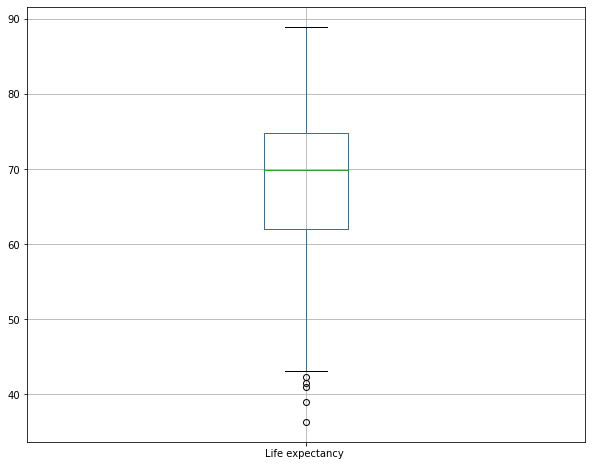

In [25]:
plt.figure(figsize = (10, 8))

data.boxplot('Life expectancy ')
plt.show()

D:\Anaconda_3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


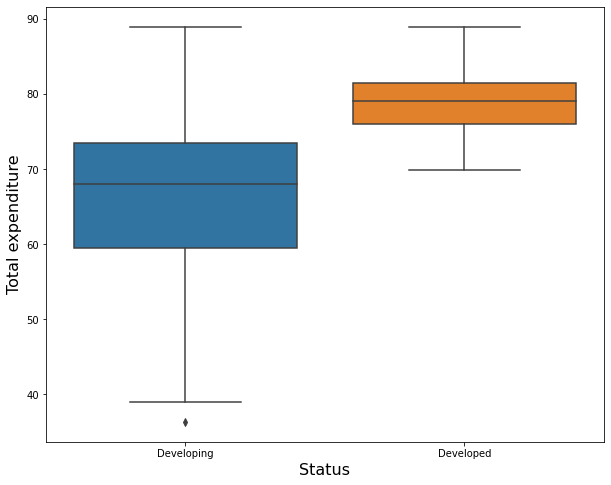

In [27]:
plt.figure(figsize = (10, 8))

sns.boxplot("Status", 'Life expectancy ', data = data)  # shows that life expectancy is higher in developed countries.
plt.xlabel("Status", fontsize = 16)
plt.ylabel("Total expenditure", fontsize = 16)

plt.show()

In [29]:
data_corr = data[["Life expectancy ",
                 "Adult Mortality",
                 "Schooling",
                 "Total expenditure",
                 "Diphtheria ",
                 "GDP",
                 "Population"]].corr()

data_corr

,Life expectancy,Adult Mortality,Schooling,Total expenditure,Diphtheria,GDP,Population
Life expectancy,1.000000,-0.662604,0.746619,0.203689,0.449975,0.445425,-0.011420
Adult Mortality,-0.662604,1.000000,-0.408661,-0.097938,-0.212157,-0.259500,-0.021050
Schooling,0.746619,-0.408661,1.000000,0.261679,0.432891,0.471767,-0.022453
Total expenditure,0.203689,-0.097938,0.261679,1.000000,0.183238,0.212498,-0.079752
Diphtheria,0.449975,-0.212157,0.432891,0.183238,1.000000,0.190957,-0.024167
GDP,0.445425,-0.259500,0.471767,0.212498,0.190957,1.000000,-0.016800
Population,-0.011420,-0.021050,-0.022453,-0.079752,-0.024167,-0.016800,1.000000


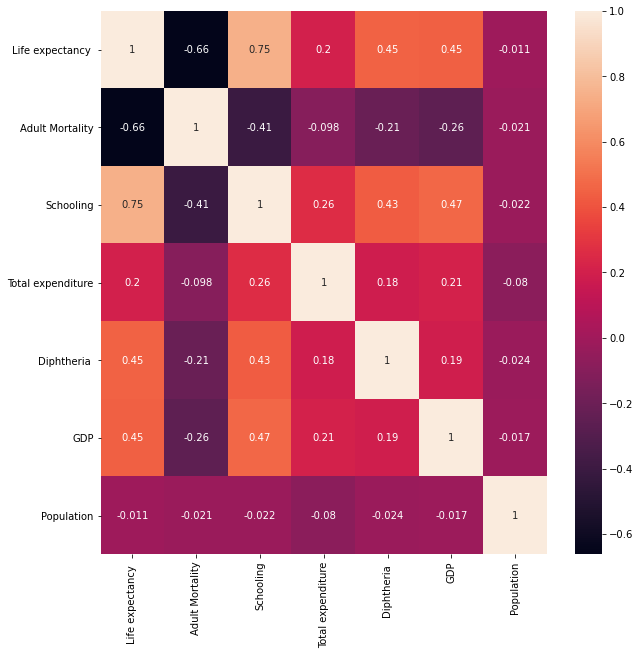

In [30]:
fig, ax = plt.subplots(figsize = (10, 10))

sns.heatmap(data_corr, annot= True)

plt.show()

In [31]:
# split dataset into features and target
features = data.drop("Life expectancy ", axis = 1)

target = data[["Life expectancy "]]

In [32]:
features.columns

Index(['Country', 'Year', 'Status', 'Adult Mortality', 'infant deaths',
       'Alcohol', 'percentage expenditure', 'Hepatitis B', 'Measles ', ' BMI ',
       'under-five deaths ', 'Polio', 'Total expenditure', 'Diphtheria ',
       ' HIV/AIDS', 'GDP', 'Population', ' thinness  1-19 years',
       ' thinness 5-9 years', 'Income composition of resources', 'Schooling'],
      dtype='object')

In [33]:
target.sample(5)

,Life expectancy
2059,82.0
685,78.5
61,46.5
2399,56.5
1535,71.4


In [34]:
# drop country col(seems not useful)
features = features.drop("Country", axis = 1)

features.columns

Index(['Year', 'Status', 'Adult Mortality', 'infant deaths', 'Alcohol',
       'percentage expenditure', 'Hepatitis B', 'Measles ', ' BMI ',
       'under-five deaths ', 'Polio', 'Total expenditure', 'Diphtheria ',
       ' HIV/AIDS', 'GDP', 'Population', ' thinness  1-19 years',
       ' thinness 5-9 years', 'Income composition of resources', 'Schooling'],
      dtype='object')

In [36]:
# try to convert status(cat data) to num data
categorical_features = features["Status"].copy()

categorical_features.head()

0    Developing
1    Developing
2    Developing
3    Developing
4    Developing
Name: Status, dtype: object

In [37]:
categorical_features = pd.get_dummies(categorical_features)

categorical_features.head()

,Developed,Developing
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In [39]:
numeric_features = features.drop(["Status"], axis = 1)  # drop cat col(status) and assign to num_features var

numeric_features.head()

,Year,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,2015,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,2014,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,2013,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,2012,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,2011,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [42]:
numeric_features.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,2128.0,2.007500e+03,4.610856e+00,2000.00000,2003.750000,2.007500e+03,2.011250e+03,2.015000e+03
Adult Mortality,2128.0,1.743003e+02,1.297593e+02,1.00000,76.000000,1.520000e+02,2.412500e+02,7.230000e+02
infant deaths,2128.0,3.590273e+01,1.362247e+02,0.00000,1.000000,4.000000e+00,2.400000e+01,1.800000e+03
Alcohol,2128.0,4.436893e+00,3.962858e+00,0.01000,0.827500,3.735000e+00,7.162500e+00,1.787000e+01
percentage expenditure,2128.0,6.400720e+02,1.710799e+03,0.00000,19.883256,8.367799e+01,4.313651e+02,1.896135e+04
Hepatitis B,2128.0,7.727206e+01,2.526004e+01,2.00000,68.000000,8.700000e+01,9.500000e+01,9.900000e+01
Measles,2128.0,2.657467e+03,1.191224e+04,0.00000,0.000000,2.000000e+01,4.592500e+02,2.121830e+05
BMI,2128.0,3.669196e+01,1.984373e+01,1.40000,18.400000,3.885000e+01,5.520000e+01,7.760000e+01
under-five deaths,2128.0,4.981720e+01,1.851527e+02,0.00000,1.000000,4.000000e+00,3.425000e+01,2.500000e+03
Polio,2128.0,8.057201e+01,2.417005e+01,3.00000,75.000000,9.100000e+01,9.600000e+01,9.900000e+01


In [43]:
# Standardize dataset
standardScaler = StandardScaler()

numeric_features = pd.DataFrame(standardScaler.fit_transform(numeric_features),
                               columns = numeric_features.columns,
                               index = numeric_features.index)

numeric_features.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,2128.0,-3.130328e-19,1.000235,-1.626978,-0.813489,0.000000,0.813489,1.626978
Adult Mortality,2128.0,5.425902e-18,1.000235,-1.335866,-0.757737,-0.171899,0.516075,4.229591
infant deaths,2128.0,-2.626737e-16,1.000235,-0.263617,-0.256275,-0.234247,-0.087396,12.952948
Alcohol,2128.0,6.365000e-17,1.000235,-1.117358,-0.911020,-0.177159,0.687950,3.390549
percentage expenditure,2128.0,-1.915239e-16,1.000235,-0.374224,-0.362599,-0.325301,-0.122022,10.711711
Hepatitis B,2128.0,7.943207e-18,1.000235,-2.980588,-0.367151,0.385202,0.701983,0.860373
Measles,2128.0,3.124067e-16,1.000235,-0.223140,-0.223140,-0.221460,-0.184578,17.593236
BMI,2128.0,6.662382e-17,1.000235,-1.778912,-0.922017,0.108777,0.932909,2.061994
under-five deaths,2128.0,-1.316107e-16,1.000235,-0.269123,-0.263721,-0.247514,-0.084097,13.236418
Polio,2128.0,-2.178969e-16,1.000235,-3.210181,-0.230588,0.431544,0.638460,0.762610


In [44]:
# combine preprocessed cat data an num data
processed_features = pd.concat([numeric_features, categorical_features], axis = 1, sort = False)

processed_features.head()

,Year,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,...,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Developed,Developing
0,1.626978,0.683732,0.191620,-1.117358,-0.332550,-0.485943,-0.126242,-0.886733,0.179261,-3.086031,...,-0.649601,-0.355934,-0.424250,0.322064,2.566866,2.523280,-0.631802,-0.497055,0,1
1,1.410048,0.745399,0.206305,-1.117358,-0.331238,-0.604736,-0.181828,-0.911936,0.195467,-0.934103,...,-0.773729,-0.355934,-0.421749,-0.207042,2.630549,2.564910,-0.646555,-0.528280,0,1
2,1.193118,0.722274,0.220990,-1.117358,-0.331416,-0.525541,-0.187034,-0.937139,0.211674,-0.768570,...,-0.690977,-0.355934,-0.420074,0.290313,2.673004,2.606539,-0.676060,-0.559506,0,1
3,0.976187,0.753107,0.243018,-1.117358,-0.328513,-0.406748,0.010876,-0.962342,0.233283,-0.561654,...,-0.566848,-0.355934,-0.416713,-0.153680,2.715459,2.668984,-0.710482,-0.590731,0,1
4,0.759257,0.776233,0.257703,-1.117358,-0.370075,-0.367151,0.029853,-0.982504,0.254892,-0.520270,...,-0.525472,-0.355934,-0.470041,-0.165057,2.779142,2.710614,-0.754739,-0.684408,0,1


In [48]:
processed_features.shape

(2128, 21)

In [50]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(processed_features,
                                                   target,
                                                   test_size = 0.2,
                                                   random_state = 1)

In [53]:
def build_single_layer_model():
    model = tf.keras.Sequential()
    
    model.add(tf.keras.layers.Dense(32,
                                    input_shape = (x_train.shape[1],), # input shape is num of features
                                   activation = "sigmoid"))
    model.add(tf.keras.layers.Dense(1))
    
    optimizer = tf.keras.optimizers.Adam(learning_rate = 0.01)
    
    model.compile(loss = "mse", metrics = ["mae", "mse"],
                 optimizer = optimizer)
    
    return model

In [54]:
model = build_single_layer_model()

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                704       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 737
Trainable params: 737
Non-trainable params: 0
_________________________________________________________________


In [55]:
# viz model layers
tf.keras.utils.plot_model(model)

('Failed to import pydot. You must `pip install pydot` and install graphviz (https://graphviz.gitlab.io/download/), ', 'for `pydotprint` to work.')


In [56]:
num_epochs = 100

training_history = model.fit(x_train, y_train,
                            epochs = num_epochs,
                            validation_split = 0.2,
                            verbose = True)

Epoch 1/100
43/43 [==============================] - 1s 30ms/step - loss: 4037.7415 - mae: 62.8411 - mse: 4037.7415 - val_loss: 3384.3867 - val_mae: 57.5790 - val_mse: 3384.3867
Epoch 2/100
43/43 [==============================] - 0s 6ms/step - loss: 2695.0867 - mae: 51.0491 - mse: 2695.0867 - val_loss: 1991.1714 - val_mae: 43.8056 - val_mse: 1991.1714
Epoch 3/100
43/43 [==============================] - 0s 6ms/step - loss: 1432.7081 - mae: 36.6465 - mse: 1432.7081 - val_loss: 952.9231 - val_mae: 29.7753 - val_mse: 952.9231
Epoch 4/100
43/43 [==============================] - 0s 5ms/step - loss: 645.5537 - mae: 23.8526 - mse: 645.5537 - val_loss: 409.1866 - val_mae: 18.6344 - val_mse: 409.1866
Epoch 5/100
43/43 [==============================] - 0s 5ms/step - loss: 274.8016 - mae: 14.6904 - mse: 274.8016 - val_loss: 178.7314 - val_mae: 11.5941 - val_mse: 178.7314
Epoch 6/100
43/43 [==============================] - 0s 5ms/step - loss: 125.8832 - mae: 9.4960 - mse: 125.8832 - val_loss: 

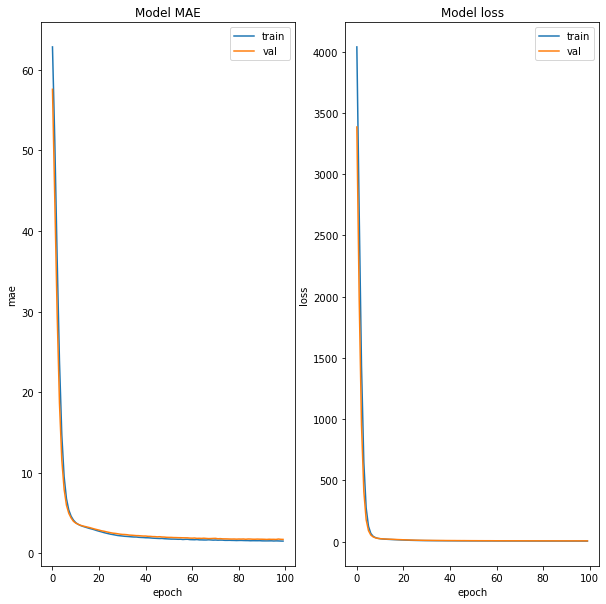

In [57]:
# model performance viz
plt.figure(figsize = (10, 10))
plt.subplot(1, 2, 1)

plt.plot(training_history.history["mae"])
plt.plot(training_history.history["val_mae"])

plt.title("Model MAE")
plt.ylabel("mae")
plt.xlabel("epoch")
plt.legend(["train", "val"])

plt.subplot(1, 2, 2)

plt.plot(training_history.history["loss"])
plt.plot(training_history.history["val_loss"])

plt.title("Model loss")
plt.ylabel("loss")
plt.xlabel("epoch")
plt.legend(["train", "val"])

In [58]:
model.evaluate(x_test, y_test)

14/14 [==============================] - 0s 2ms/step - loss: 5.9071 - mae: 1.7765 - mse: 5.9071


[5.907129287719727, 1.7764829397201538, 5.907129287719727]

In [59]:
y_pred = model.predict(x_test)

r2_score(y_test, y_pred)

0.9345599447805543

In [60]:
# df to hold actual life expectancy value and predicted life expectancy value
pred_results = pd.DataFrame({"y_test": y_test.values.flatten(),
                            "y_pred": y_pred.flatten()}, index = range(len(y_pred)))

pred_results.sample(10)

,y_test,y_pred
130,54.1,54.046879
48,71.4,74.303238
34,81.0,80.880402
408,71.7,74.145744
319,48.1,48.041813
238,79.8,81.315521
299,54.2,53.956169
17,65.6,63.400265
301,71.0,70.637253
95,62.6,61.797264


In [61]:
# build multi layered model
def build_multiple_layer_model():
    model = keras.Sequential([
        layers.Dense(2, input_shape = (x_train.shape[1],), activation = "relu"),
        layers.Dense(16, activation = "relu"),
        layers.Dense(4, activation = "relu"),
        layers.Dense(1)
    ])
    
    optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001)
    
    model.compile(loss = "mse", metrics = ["mae", "mse"], optimizer = optimizer)
    
    return model

In [62]:
model = build_multiple_layer_model()

tf.keras.utils.plot_model(model, show_shapes = True)

('Failed to import pydot. You must `pip install pydot` and install graphviz (https://graphviz.gitlab.io/download/), ', 'for `pydotprint` to work.')


In [76]:
logdir = os.path.join("./logs/", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))

tensorboard_callback = keras.callbacks.TensorBoard(logdir, histogram_freq = 1)   

In [77]:
training_history = model.fit(x_train, y_train,
                            validation_split = 0.2,
                            epochs = 500,
                            batch_size = 100,
                            callbacks = [tensorboard_callback])

Epoch 1/500
 1/14 [=>............................] - ETA: 0s - loss: 4746.6587 - mae: 68.2726 - mse: 4746.6587WARNING:tensorflow:From D:\Anaconda_3\lib\site-packages\tensorflow\python\ops\summary_ops_v2.py:1277: stop (from tensorflow.python.eager.profiler) is deprecated and will be removed after 2020-07-01.
Instructions for updating:
use `tf.profiler.experimental.stop` instead.
14/14 [==============================] - 2s 176ms/step - loss: 4703.0786 - mae: 67.9059 - mse: 4703.0786 - val_loss: 4709.6182 - val_mae: 67.9622 - val_mse: 4709.6182
Epoch 2/500
14/14 [==============================] - 0s 28ms/step - loss: 4690.6982 - mae: 67.8174 - mse: 4690.6982 - val_loss: 4695.8403 - val_mae: 67.8633 - val_mse: 4695.8403
Epoch 3/500
14/14 [==============================] - 1s 40ms/step - loss: 4674.5464 - mae: 67.7001 - mse: 4674.5464 - val_loss: 4678.0039 - val_mae: 67.7339 - val_mse: 4678.0039
Epoch 4/500
14/14 [==============================] - 0s 24ms/step - loss: 4654.1812 - mae: 67.55

In [78]:
%load_ext tensorboard

In [79]:
%tensorboard --logdir "./logs/" --port 7070

ERROR: Timed out waiting for TensorBoard to start. It may still be running as pid 1040.

In [80]:
model.evaluate(x_test, y_test)

14/14 [==============================] - 0s 2ms/step - loss: 12.3601 - mae: 2.6874 - mse: 12.3601


[12.360095024108887, 2.6873652935028076, 12.360095024108887]

In [81]:
y_pred = model.predict(x_test)

r2_score(y_test, y_pred)

0.8630730221761399